- 기본세팅

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [1]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


Data set

In [5]:
filepath = '/content/mnt/MyDrive/proj1_1조/data/'

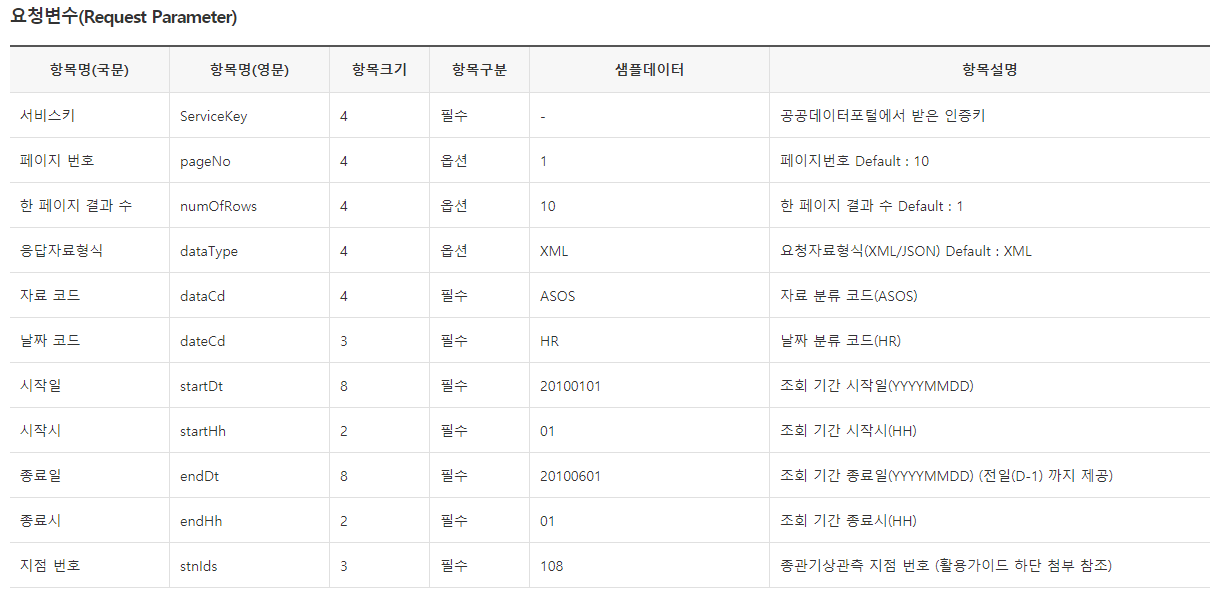

In [6]:
encoding_k = '5hKnz%2FSOwgTelwTnXx36H%2BKOB9ObVv9LZ5KPCTZiYY0hYEubhGfovemBVL884JkVyGPNNj5aD%2BYPJ2k3cKFkvg%3D%3D'
decoding_k = '5hKnz/SOwgTelwTnXx36H+KOB9ObVv9LZ5KPCTZiYY0hYEubhGfovemBVL884JkVyGPNNj5aD+YPJ2k3cKFkvg=='

In [7]:
start_date = '20160201' # train 데이터의 시작 일자
end_date = '20210126' # train 데이터의 마감 일자
page_no = '1'
num_rows = '999' # 최대 1000개 이상을 요청할수는 없음..
location = '192' # 진주 위치코드

In [8]:
# 기상청_지상(종관, ASOS) 시간자료 조회서비스 (https://www.data.go.kr/data/15057210/openapi.do)
baseurl = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList?serviceKey=' + encoding_k
url1 = '&numOfRows=' + num_rows
url2 = '&pageNo=' + page_no
url3 = '&dataCd=ASOS&dateCd=HR'
url4 = '&stnIds=' + location # 위치 코드
url5 = '&endDt=' + end_date
url6 = '&endHh=' + '19' #
url7 = '&startHh='+ '11' # 1시간 단위로 체크
url8 = '&startDt=' + start_date

url = baseurl + url1 + url2 + url3 + url4 + url5 + url6 + url7 + url8
print(url)

http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList?serviceKey=5hKnz%2FSOwgTelwTnXx36H%2BKOB9ObVv9LZ5KPCTZiYY0hYEubhGfovemBVL884JkVyGPNNj5aD%2BYPJ2k3cKFkvg%3D%3D&numOfRows=999&pageNo=1&dataCd=ASOS&dateCd=HR&stnIds=192&endDt=20210126&endHh=19&startHh=11&startDt=20160201


In [9]:
xml = requests.get(url)
soup = bs(xml.text, 'html.parser')

In [ ]:
soup

### 여름철 불쾌지수

80이상 : 전원 불쾌감

75-80 : 50%정도 불쾌감

68-75 : 불쾌감 나타내기 시작

68미만 : 전원 쾌적함을 느낌

Ta : 건구온도 (℃)

RH : 상대습도 (소수단위)

V : 풍속

불쾌지수 = 9/5 x Ta - 0.55 (1-RH)(9/5 x Ta-26)+32

체감온도(℃)=13.12 + 0.6215 × Ta - 11.37 x V^0.16 + 0.3965 x V^0.16 x Ta




In [ ]:
# - tm : 시간
# - ta : 기온
# - rn : 강수량
# - ws : 풍속
# - hm : 습도
# - dsnw : 적설
# - ts : 지면온도

data = soup.find_all('item')
con_lst=[]

for item in data:
    time = item.find('tm').text # 시간
    temper = item.find('ta').text # 기온
    rain = item.find('rn').text # 강수량
    wind = item.find('ws').text # 풍속
    hm = item.find('hm').text # 습도
    snow = item.find('dsnw').text # 적설
    tem_s = item.find('ts').text # 지면온도
    con_lst.append({'날짜':time, '기온':temper, '습도':hm, 
                    '강수량':rain, '적설량':snow, '풍속':wind})
con_lst

### 점심시간 12:00 ~ / 11~13시까지의 데이터 분석
### 저녁시간 18:00 ~ / 17~19시 까지의 데이터 분석

In [11]:
# 아래와 같이 해도 됨. 그러면 con_lst 순서대로 나오고 columns를 하면 내가 순서를 변경할 수 있음.
# df = pd.DataFrame(con_lst)

df = pd.DataFrame(con_lst, columns = ['날짜','기온','습도','강수량','적설량','풍속'])

# df=pd.read_csv('....csv')
df.head()

,날짜,기온,습도,강수량,적설량,풍속
0,2016-02-01 11:00,1.8,27,,,1.3
1,2016-02-01 12:00,3.0,24,,,1.9
2,2016-02-01 13:00,4.2,22,,,1.9
3,2016-02-01 14:00,4.6,20,,,2.6
4,2016-02-01 15:00,4.2,20,,,3.5


In [12]:
df.describe()

,날짜,기온,습도,강수량,적설량,풍속
count,999,999,999,999,999,999
unique,999,235,82,32,1,52
top,2016-02-28 06:00,7.7,92,,,0.1
freq,1,14,23,957,999,66


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      999 non-null    object
 1   기온      999 non-null    object
 2   습도      999 non-null    object
 3   강수량     999 non-null    object
 4   적설량     999 non-null    object
 5   풍속      999 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB


- 강수량, 적설량 내부에 '' 빈값이 존재

In [14]:
df.강수량.unique()

array(['', '0.0', '3.6', '4.0', '9.4', '15.8', '20.4', '4.1', '5.5',
       '1.6', '0.1', '0.5', '4.5', '3.0', '0.7', '0.9', '2.1', '0.2',
       '1.8', '1.7', '2.2', '20.3', '5.4', '2.6', '6.1', '16.2', '16.3',
       '1.3', '0.6', '2.7', '6.5', '0.3'], dtype=object)

In [15]:
df.적설량.unique()

array([''], dtype=object)

In [16]:
# '' 빈 값을 nan값으로 바꾼후 결측치 제거
df.강수량.replace('', np.nan, inplace=True)
df.적설량.replace('', np.nan, inplace=True)

In [17]:
df['강수량'] = df['강수량'].fillna(0)
df['적설량'] = df['적설량'].fillna(0)

In [18]:
numeric_list = ['기온', '습도', '강수량', '적설량', '풍속']

for x in numeric_list:
  try:
    df[x] = df[x].astype(float)
  except:
    print(x)

In [ ]:
# 강수량이 2mm이상인 경우 사람들은 우산을 사거나 찾게 된다고 함.
# 1mm이상인 경우는 흔히 이슬비로 생각하는 수준.
# 그렇지만 비를맞거나 눈을 맞으면서 밖으로 나가는것은 좀 꺼려지지 않을까?
# 물론 자동차가 있는 시대지만.. 덜 외식할 것으로 예상된다.

- 불쾌지수, 체감온도 계산

In [19]:
# DI = 9/5Ta-0.55(1-RH)(9/5Ta-26)+32
df['불쾌지수'] = (9/5) * df['기온'] - 0.55 * (1-df['습도']/100) * (((9/5) * df['기온']) - 26) + 32

In [20]:
df['불쾌지수'] = df.불쾌지수.astype(int)

In [21]:
df.describe()

,기온,습도,강수량,적설량,풍속,불쾌지수
count,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,3.720020,53.458458,0.167167,0.0,1.331131,42.962963
std,5.826895,23.451524,1.393861,0.0,1.141423,8.946491
min,-9.100000,11.000000,0.000000,0.0,0.000000,20.000000
25%,-0.800000,33.000000,0.000000,0.0,0.400000,37.000000
50%,4.000000,53.000000,0.000000,0.0,1.000000,45.000000
75%,7.900000,74.000000,0.000000,0.0,2.000000,49.000000
max,19.200000,92.000000,20.400000,0.0,5.300000,64.000000


In [22]:
df.head()

,날짜,기온,습도,강수량,적설량,풍속,불쾌지수
0,2016-02-01 11:00,1.8,27.0,0.0,0.0,1.3,44
1,2016-02-01 12:00,3.0,24.0,0.0,0.0,1.9,46
2,2016-02-01 13:00,4.2,22.0,0.0,0.0,1.9,47
3,2016-02-01 14:00,4.6,20.0,0.0,0.0,2.6,48
4,2016-02-01 15:00,4.2,20.0,0.0,0.0,3.5,47


In [23]:
# 체감온도(℃)=13.12+0.6215×T-11.37V^0.16+0.3965V^0.16×T
df['체감온도'] = np.round(13.12 + 0.6215 * df['기온'] - 11.37 * df['풍속'] ** 0.16 + 0.3965 * df['풍속'] ** 0.16 * df['기온'], 1)

In [24]:
df.head()

,날짜,기온,습도,강수량,적설량,풍속,불쾌지수,체감온도
0,2016-02-01 11:00,1.8,27.0,0.0,0.0,1.3,44,3.1
1,2016-02-01 12:00,3.0,24.0,0.0,0.0,1.9,46,3.7
2,2016-02-01 13:00,4.2,22.0,0.0,0.0,1.9,47,5.0
3,2016-02-01 14:00,4.6,20.0,0.0,0.0,2.6,48,4.9
4,2016-02-01 15:00,4.2,20.0,0.0,0.0,3.5,47,3.9


- 날짜를 요일과 시간대로 분류

In [ ]:
import calendar
import datetime

In [25]:
df['시간'] = df['날짜'].apply(lambda x : x.split(' ')[1])
df['날짜'] = df['날짜'].apply(lambda x : x.split(' ')[0])

In [26]:
df.head()

,날짜,기온,습도,강수량,적설량,풍속,불쾌지수,체감온도,시간
0,2016-02-01,1.8,27.0,0.0,0.0,1.3,44,3.1,11:00
1,2016-02-01,3.0,24.0,0.0,0.0,1.9,46,3.7,12:00
2,2016-02-01,4.2,22.0,0.0,0.0,1.9,47,5.0,13:00
3,2016-02-01,4.6,20.0,0.0,0.0,2.6,48,4.9,14:00
4,2016-02-01,4.2,20.0,0.0,0.0,3.5,47,3.9,15:00


In [27]:
df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

# 계산의 편의성을 위해 시간데이터를 00~23으로 변환
df['시간'] = df['시간'].apply(lambda x: int(x.split(':')[0]))

In [28]:
df.head()

,날짜,기온,습도,강수량,적설량,풍속,불쾌지수,체감온도,시간
0,2016-02-01,1.8,27.0,0.0,0.0,1.3,44,3.1,11
1,2016-02-01,3.0,24.0,0.0,0.0,1.9,46,3.7,12
2,2016-02-01,4.2,22.0,0.0,0.0,1.9,47,5.0,13
3,2016-02-01,4.6,20.0,0.0,0.0,2.6,48,4.9,14
4,2016-02-01,4.2,20.0,0.0,0.0,3.5,47,3.9,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      999 non-null    datetime64[ns]
 1   기온      999 non-null    float64       
 2   습도      999 non-null    float64       
 3   강수량     999 non-null    float64       
 4   적설량     999 non-null    float64       
 5   풍속      999 non-null    float64       
 6   불쾌지수    999 non-null    int64         
 7   체감온도    999 non-null    float64       
 8   시간      999 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 70.4 KB


In [ ]:
lun_df = df[(df['시간'] > 10) & (df['시간'] < 14)] # 점심 데이터

In [ ]:
eve_df = df[(df['시간'] > 16) & (df['시간'] < 20)] # 저녁 데이터

In [ ]:
lun_df.head()

,날짜,기온,습도,강수량,적설량,풍속,불쾌지수,체감온도,시간
0,2016-02-01,1.8,27.0,0.0,0.0,1.3,44,3.1,11
1,2016-02-01,3.0,24.0,0.0,0.0,1.9,46,3.7,12
2,2016-02-01,4.2,22.0,0.0,0.0,1.9,47,5.0,13
24,2016-02-02,0.3,29.0,0.0,0.0,1.1,42,1.9,11
25,2016-02-02,1.7,24.0,0.0,0.0,1.6,44,2.6,12


In [ ]:
eve_df.head()

,날짜,기온,습도,강수량,적설량,풍속,불쾌지수,체감온도,시간
6,2016-02-01,3.0,25.0,0.0,0.0,2.2,45,3.4,17
7,2016-02-01,0.9,31.0,0.0,0.0,1.5,42,1.9,18
8,2016-02-01,-0.7,39.0,0.0,0.0,1.0,39,1.0,19
30,2016-02-02,5.2,19.0,0.0,0.0,0.9,48,7.2,17
31,2016-02-02,2.4,28.0,0.0,0.0,1.3,44,3.7,18


- 하루당 6개의 데이터 생성. 점심 3개, 저녁 3개

: 불쾌지수와 체감온도의 평균을 내서 새로운 데이터로 만들어볼 예정



In [ ]:
# 3개씩 추출해서 새로운 df로 만드는 연습
temp = lun_df.iloc[0:3]
tem_mean = temp['체감온도'].mean()
di_mean = temp['불쾌지수'].mean()

list_ = []
# print(temp)
# print(tem_mean, di_mean)
list_.append({'날짜': temp['날짜'][0], '체감온도': tem_mean, '불쾌지수': di_mean})
# list_

n_df = pd.DataFrame(list_, columns = ['날짜', '체감온도', '불쾌지수'])
n_df

,날짜,체감온도,불쾌지수
0,2016-02-01,3.933333,45.666667


In [ ]:
lun_df.index

Int64Index([  0,   1,   2,  24,  25,  26,  48,  49,  50,  72,
            ...
            914, 936, 937, 938, 960, 961, 962, 984, 985, 986],
           dtype='int64', length=126)

In [ ]:
eve_df.index

Int64Index([  6,   7,   8,  30,  31,  32,  54,  55,  56,  78,
            ...
            920, 942, 943, 944, 966, 967, 968, 990, 991, 992],
           dtype='int64', length=126)

In [ ]:
# 3단위로 끊어서 정리
temp_list=[]

# 순서i 와 idx를 따로 받아서 iloc를 해서 호출해야 정상적으로 불러지고,
# 날짜 데이터를 가져올때는 idx
for i, idx in enumerate(lun_df.index):
  # print(f'i={i}, idx={idx}') # i와 idx관계를 확인하기 위한 print문

  if idx % 3 == 0: # 첫 시작 idx를 찾는다
    temp = lun_df.iloc[i:i+3] # 3개의 row를 가져와 계산
    
    umb = 0 # 우산유무
    for r in temp['강수량'].values:
      if r > 0.0:
        umb = 1
    
    if umb == 0:
      for s in temp['적설량'].values:
        if s > 0.0:
          umb = 1

    tem_mean = temp['체감온도'].mean()
    di_mean = temp['불쾌지수'].mean()
    
    try: # temp['날짜'][idx] 로 호출해야 정상적으로 그 묶음의 날짜를 가져올 수 있음
      temp_list.append({'날짜': temp['날짜'][idx], '체감온도': np.round(tem_mean,1), '불쾌지수': int(di_mean), '우산': umb})
    except: # 현재는 오류 발생하지 않음
      print(i)

tdf = pd.DataFrame(temp_list, columns = ['날짜', '체감온도', '불쾌지수', '우산'])
tdf

In [ ]:
# sensible temperature 체감온도
# discomfort index 불쾌지수
# df를 변수로 받아서 3시간 단위로 주어지는 불쾌지수와 체감온도의 평균을 계산하고
# 새로운 DataFrame으로 만들어서 반환하는 함수

def make_st_di(df):
  temp_list=[]
  # 순서i 와 idx를 따로 받아서 iloc를 해서 호출해야 정상적으로 불러지고,
  # 날짜 데이터를 가져올때는 idx
  for i, idx in enumerate(lun_df.index):
    # print(f'i={i}, idx={idx}') # i와 idx관계를 확인하기 위한 print문

    if idx % 3 == 0: # 첫 시작 idx를 찾는다
      temp = lun_df.iloc[i:i+3] # 3개의 row를 가져와 계산
      tem_mean = temp['체감온도'].mean()
      di_mean = temp['불쾌지수'].mean()
      try: # temp['날짜'][idx] 로 호출해야 정상적으로 그 묶음의 날짜를 가져올 수 있음
        temp_list.append({'날짜': temp['날짜'][idx], '체감온도': np.round(tem_mean,1), '불쾌지수': int(di_mean)})
      except: # 현재는 오류 발생하지 않음
        print(i)
  new_df = pd.DataFrame(temp_list, columns = ['날짜', '체감온도', '불쾌지수'])
  return new_df

In [ ]:
# sensible temperature 체감온도
# discomfort index 불쾌지수
# df를 변수로 받아서 3시간 단위로 주어지는 불쾌지수와 체감온도의 평균계산
# 강수량과 적설량을 판단해 우산이 필요한지 판단
# 새로운 DataFrame으로 만들어서 반환하는 함수

def make_st_di_um(df):
  temp_list=[]
  # 순서i 와 idx를 따로 받아서 iloc를 해서 호출해야 정상적으로 불러지고,
  # 날짜 데이터를 가져올때는 idx
  for i, idx in enumerate(lun_df.index):
    if idx % 3 == 0: # 첫 시작 idx를 찾는다
      temp = lun_df.iloc[i:i+3] # 3개의 row를 가져와 계산

      umb = 0 # 우산유무

      for r in temp['강수량'].values:
        if r > 0.0:
          umb = 1
        
      if umb == 0:
        for s in temp['적설량'].values:
          if s > 0.0:
            umb = 1

      tem_mean = temp['체감온도'].mean()
      di_mean = temp['불쾌지수'].mean()
        
      # temp['날짜'][idx] 로 호출해야 정상적으로 그 묶음의 날짜를 가져올 수 있음
      temp_list.append({'날짜': temp['날짜'][idx], '체감온도': np.round(tem_mean,1), '불쾌지수': int(di_mean), '우산': umb})
  new_df = pd.DataFrame(temp_list, columns = ['날짜', '체감온도', '불쾌지수', '우산'])
  return new_df

In [ ]:
# new_lun_df = make_st_di(lun_df)

In [ ]:
# new_eve_df = make_st_di(eve_df)

In [ ]:
new_lun_df = make_st_di_um(lun_df)
new_eve_df = make_st_di_um(eve_df)

In [ ]:
new_lun_df2

,날짜,체감온도,불쾌지수,우산
0,2016-02-01,3.9,45,0
1,2016-02-01,3.9,45,0
2,2016-02-01,3.9,45,0
3,2016-02-02,3.1,44,0
4,2016-02-02,3.1,44,0
...,...,...,...,...
121,2016-03-12,6.8,49,0
122,2016-03-12,6.8,49,0
123,2016-03-13,9.0,50,0
124,2016-03-13,9.0,50,0


In [ ]:
new_lun_df.tail()

,날짜,체감온도,불쾌지수,우산
37,2016-03-09,7.2,49,0
38,2016-03-10,6.1,49,0
39,2016-03-11,5.0,47,0
40,2016-03-12,6.8,49,0
41,2016-03-13,9.0,50,0


In [ ]:
new_eve_df.tail()

,날짜,체감온도,불쾌지수,우산
37,2016-03-09,7.2,49,0
38,2016-03-10,6.1,49,0
39,2016-03-11,5.0,47,0
40,2016-03-12,6.8,49,0
41,2016-03-13,9.0,50,0


### 앞으로 해야할 일.. 전체 날짜별 데이터를 수집하여 정리하기..

In [ ]:
new_lun_df.to_csv(filepath+'일별_점심시간_0313.csv', index=False)

In [ ]:
new_eve_df.to_csv(filepath+'일별_저녁시간_0313.csv', index=False)

In [ ]:
# 체감온도(℃)=13.12+0.6215×T-11.37V^0.16+0.3965V^0.16×T
df['체감온도'] = np.round(13.12 + 0.6215 * df['기온'] - \
                      11.37 * df['풍속'] ** 0.16 + 0.3965 * df['풍속'] ** 0.16 * df['기온'], 1)